In [ ]:
#| default_exp core

# Mistinguette's source 

## Setup

In [ ]:
#| export
import os
from collections import abc
from fastcore.utils import *
from fastcore.meta import delegates
import ast, json, base64
from random import choices
from string import ascii_letters,digits

# Mistral AI messages are compatible with OpenAI's messages
from msglm import mk_msg_openai as mk_msg, mk_msgs_openai as mk_msgs
from toolslm.funccall import *

import mistralai
from mistralai import Mistral
from mistralai.models import ChatCompletionChoice, ChatCompletionResponse, UsageInfo, CompletionEvent
from mistralai.models.functioncall import FunctionCall
from mistralai.types import BaseModel

from typing import Optional

try: from IPython import display
except: display=None

In [ ]:
#| export
_all_ = ['mk_msg', 'mk_msgs']

In [ ]:
#| export
MISTRAL_API_KEY = os.environ.get("MISTRAL_API_KEY")

In [ ]:
#| exports
model_types = {
    # Premier models
    'codestral-2501': 'codestral-latest', # code generation model
    'mistral-large-2411': 'mistral-large-latest', # top-tier reasoning model for high-complexity tasks
    'pixtral-large-2411': 'pixtral-large-latest', # frontier-class multimodal model
    'mistral-saba-2502': 'mistral-saba-latest', # model for languages from the Middle East and South Asia
    'ministral-3b-2410': 'ministral-3b-latest', # edge model
    'ministral-8b-2410': 'ministral-8b-latest', # edge model with high performance/price ratio
    'mistral-embed-2312': 'mistral-embed', # embedding model
    'mistral-moderation-2411': 'mistral-moderation-latest', # moderation service to detect harmful text content
    'mistral-ocr-2503': 'mistral-ocr-latest', # OCR model to extract interleaved text and images
    
    # Free models (with weight availability)
    'mistral-small-2503': 'mistral-small-latest', # small model with image understanding capabilities
    
    # Research models
    'open-mistral-nemo-2407': 'open-mistral-nemo', # multilingual open source model
}

In [ ]:
#| exports
all_models = list(model_types)

In [ ]:
#| exports
vision_models = ['pixtral-large-2411', 'mistral-small-2503', 'mistral-ocr-2503']

In [ ]:
#| exports
embed_models = ['mistral-embed-2312']

In [ ]:
#| exports
ocr_models = ['mistral-ocr-2503']

In [ ]:
#| exports
tool_models = ['codestral-2501', 'mistral-large-2411', 
               'mistral-small-2503', 'ministral-3b-2410', 'ministral-8b-2410',
               'pixtral-large-2411', 'open-mistral-nemo-2407']

In [ ]:
#| exports
text_only_models = set(all_models) - set(vision_models) - set(embed_models) - set(ocr_models)

In [ ]:
#| exports
has_streaming_models = set(all_models) - set(embed_models) - set(ocr_models)
has_system_prompt_models = set(all_models) - set(embed_models) - set(ocr_models)
has_temperature_models = set(all_models) - set(embed_models) - set(ocr_models)

In [ ]:
#| exports
def can_stream(m): return m in has_streaming_models
def can_set_system_prompt(m): return m in has_system_prompt_models
def can_set_temperature(m): return m in has_temperature_models
def can_use_image(m): return m in vision_models

In [ ]:
# all models except codestral-mamba support custom structured outputs

In [ ]:
#| export
models = all_models

In [ ]:
model = models[1]; model

'mistral-large-2411'

## Mistral SDK

In [ ]:
cli = Mistral(api_key=MISTRAL_API_KEY)

This is what Mistral's SDK provides for interacting with Python. To use it, pass it a list of *messages*, with *content* and a *role*. The roles should alternate between *user* and *assistant*.

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "What's in this image?"
            },
            {
                "type": "image_url",
                "image_url": "https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg"
            }
        ]
    }
]

# Get the chat response
chat_response = cli.chat.complete(
    model='pixtral-large-2411',
    messages=messages
)

In [ ]:
chat_response

ChatCompletionResponse(id='7b394afb791f4b00afba2da0f7e23814', object='chat.completion', model='pixtral-large-2411', usage=UsageInfo(prompt_tokens=1360, completion_tokens=133, total_tokens=1493), created=1743585871, choices=[ChatCompletionChoice(index=0, message=AssistantMessage(content="The image depicts the Eiffel Tower in Paris, France, on a snowy winter day. The iconic tower is prominently featured in the background, covered with a light layer of snow, giving it a picturesque and serene appearance. The surrounding area includes leafless trees, their branches also dusted with snow, enhancing the wintery ambiance. The ground is blanketed in white, and the scene is framed by a classic Parisian lamp post and a fenced pathway. The overall setting exudes a calm, peaceful, and almost magical winter atmosphere in one of the world's most famous landmarks.", tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')])

In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "What's in this image?"
            },
            {
                "type": "image_url",
                "image_url": "https://tripfixers.com/wp-content/uploads/2019/11/eiffel-tower-with-snow.jpeg"
            }
        ]
    }
]

# Get the chat response
stream_response = cli.chat.stream(
    model='pixtral-large-2411',
    messages=messages
)

In [ ]:
for chunk in stream_response:
    print(chunk.data.choices[0].delta.content)


The
 image
 features
 a
 snow
y
 scene
 of
 the
 E
iff
el
 Tower
 in
 Paris
,
 France
.
 The
 icon
ic
 structure
 is
 seen
 in
 the
 background
,
 tow
ering
 above
 the
 snow
-
covered
 landscape
.
 The
 fore
ground
 displays
 a
 pictures
que
 path
way
 lined
 with
 bare
 trees
,
 their
 branches
 lightly
 dust
ed
 with
 snow
.
 A
 classic
 Paris
ian
 l
am
pp
ost
 is
 visible
 along
 the
 path
way
,
 adding
 to
 the
 winter
 charm
.
 The
 overall
 atmosphere
 is
 ser
ene
 and
 magical
,
 show
c
asing
 the
 beauty
 of
 Paris
 during
 the
 winter
 season
.



In [ ]:
# Here are the list of different client methods:
# - chat.complete (completion)
# - chat.stream (completion streaming)
# - chat.parse (structured output for instance)
# - chat.fim.complete (fim: fill in middle / code generation)
# - chat.ocr.process (ocr)
# - chat.embeddings.create (embedding creation)

In [ ]:
m = {'role': 'user', 'content': "I'm Jeremy"}
r = cli.chat.complete(messages = [m], model = model)
r

ChatCompletionResponse(id='b6ed028d89724a50a70df00904a1bf93', object='chat.completion', model='mistral-large-2411', usage=UsageInfo(prompt_tokens=7, completion_tokens=27, total_tokens=34), created=1743585882, choices=[ChatCompletionChoice(index=0, message=AssistantMessage(content='Hello Jeremy! Nice to meet you. How are you doing today? Is there something you would like to talk about or do?', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')])

In [ ]:
print(r)

id='b6ed028d89724a50a70df00904a1bf93' object='chat.completion' model='mistral-large-2411' usage=UsageInfo(prompt_tokens=7, completion_tokens=27, total_tokens=34) created=1743585882 choices=[ChatCompletionChoice(index=0, message=AssistantMessage(content='Hello Jeremy! Nice to meet you. How are you doing today? Is there something you would like to talk about or do?', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]


### Formatting output

In [ ]:
# Notes:
#  - assistant message with prefix true, should be last message
#  - assistant message with prefix false cannot be last.

# Type of messages:
#  - system: instructions for the assistant (system prompt I guess - sp)  (content, role='system')
#  - user: user message (content, role='user')  
#  - assistant: assistant message (content, tool_calls, prefix, role='assistant')
#  - tool: tool call (content, tool_call_id, name, role='tool')

# Check also:
# - prefix
# - safe_prompt (for guardrailing)

In [ ]:
#| exports
def find_block(r:abc.Mapping, # The message to look in
              ):
    "Find the message in `r`"
    if isinstance(r, CompletionEvent): r = r.data # if async
    m = nested_idx(r, 'choices', 0)
    if not m: return m
    if hasattr(m, 'message'): return m.message
    return m.delta

In [ ]:
find_block(r)

AssistantMessage(content='Hello Jeremy! Nice to meet you. How are you doing today? Is there something you would like to talk about or do?', tool_calls=None, prefix=False, role='assistant')

In [ ]:
#| exports
def contents(r):
    "Helper to get the contents from response `r`."
    blk = find_block(r)
    if not blk: return r
    if hasattr(blk, 'content'): return getattr(blk,'content')
    return blk

In [ ]:
contents(r)

'Hello Jeremy! Nice to meet you. How are you doing today? Is there something you would like to talk about or do?'

In [ ]:
#| exports
@patch
def _repr_markdown_(self:ChatCompletionResponse):
    det = '\n- '.join(f'{k}: {v}' for k,v in dict(self).items())
    res = contents(self)
    if not res: return f"- {det}"
    return f"""{contents(self)}

<details>

- {det}

</details>"""

In [ ]:
r

Hello Jeremy! Nice to meet you. How are you doing today? Is there something you would like to talk about or do?

<details>

- id: b6ed028d89724a50a70df00904a1bf93
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=7 completion_tokens=27 total_tokens=34
- created: 1743585882
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='Hello Jeremy! Nice to meet you. How are you doing today? Is there something you would like to talk about or do?', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

In [ ]:
r.usage

UsageInfo(prompt_tokens=7, completion_tokens=27, total_tokens=34)

In [ ]:
#| exports
def usage(inp=0, # input tokens
          out=0,  # Output tokens
         ):
    "Slightly more concise version of `UsageInfo`."
    return UsageInfo(prompt_tokens=inp, completion_tokens=out, total_tokens=inp+out)

In [ ]:
usage(5)

UsageInfo(prompt_tokens=5, completion_tokens=0, total_tokens=5)

In [ ]:
#| exports
@patch
def __repr__(self:UsageInfo): return f'In: {self.prompt_tokens}; Out: {self.completion_tokens}; Total: {self.total_tokens}'

In [ ]:
r.usage

In: 7; Out: 27; Total: 34

In [ ]:
#| exports
@patch
def __add__(self:UsageInfo, b):
    "Add together each of `input_tokens` and `output_tokens`"
    return usage(self.prompt_tokens+b.prompt_tokens, self.completion_tokens+b.completion_tokens)

In [ ]:
r.usage+r.usage

In: 14; Out: 54; Total: 68

In [ ]:
# Is it relevant to Mistral AI: TBD
def wrap_latex(text, md=True):
    "Replace MistralAI LaTeX codes with markdown-compatible ones"
    text = re.sub(r"\\\((.*?)\\\)", lambda o: f"${o.group(1)}$", text)
    res = re.sub(r"\\\[(.*?)\\\]", lambda o: f"$${o.group(1)}$$", text, flags=re.DOTALL)
    if md: res = display.Markdown(res)
    return res

In [ ]:
#| exports
@patch(as_prop=True)
def total(self:UsageInfo): return self.total_tokens

In [ ]:
usage(5,1).total

6

### Creating messages

Creating message dictionaries manually can be tedious, so we'll use helper functions from the `msglm` library.
 
We'll use `mk_msg` to easily create messages like `{'role': 'user', 'content': "I'm Jeremy"}`. Since Mistral AI's message format is compatible with OpenAI's structure, we imported : `from msglm import mk_msg_openai as mk_msg, mk_msgs_openai as mk_msgs`

In [ ]:
prompt = "I'm Jeremy"
m = mk_msg(prompt)
r = cli.chat.complete(messages=[m], model=model, max_tokens=100)
r

Hello Jeremy! Nice to meet you. How can I assist you today? Let's have a friendly conversation. 😊 How are you doing?

<details>

- id: defc0db8f5f94fb3a47f2fffeffacc3e
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=7 completion_tokens=31 total_tokens=38
- created: 1743585891
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content="Hello Jeremy! Nice to meet you. How can I assist you today? Let's have a friendly conversation. 😊 How are you doing?", tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

We can pass more than just text messages to Mistral AI. As we'll see later we can also pass images, SDK objects, etc. To handle these different data types we need to pass the type along with our content to OpenAI. 

Here's an example of a multimodal message containing text and images. 

```json
{
    'role': 'user', 
    'content': [
        {'type': 'text', 'text': 'What is in the image?'},
        {'type': 'image_url', 'image_url': {'url': f'data:{MEDIA_TYPE};base64,{IMG}'}}
    ]
}
```

`mk_msg` infers the type automatically and creates the appropriate data structure. 

LLMs, don't actually have state, but instead dialogs are created by passing back all previous prompts and responses every time. With Mistral AI, they always alternate *user* and *assistant*. We'll use `mk_msgs` from `msglm` to make it easier to build up these dialog lists.

In [ ]:
msgs = mk_msgs([prompt, r, "I forgot my name. Can you remind me please?"]) 
msgs

[{'role': 'user', 'content': "I'm Jeremy"},
 AssistantMessage(content="Hello Jeremy! Nice to meet you. How can I assist you today? Let's have a friendly conversation. 😊 How are you doing?", tool_calls=None, prefix=False, role='assistant'),
 {'role': 'user', 'content': 'I forgot my name. Can you remind me please?'}]

In [ ]:
r = cli.chat.complete(messages=msgs, model=model, max_tokens=100)
r

Of course! You just told me your name is Jeremy.

<details>

- id: 329522f02b7c499597ad0f72664ba439
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=51 completion_tokens=13 total_tokens=64
- created: 1743585893
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='Of course! You just told me your name is Jeremy.', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

In addition to the standard 'user' and 'assistant' roles found in the OpenAI API for instance, Mistral AI's API also supports 'system' roles for providing instructions to the model and 'tool' roles for tool-based interactions. 

Let's see it in action as demonstrated in [Mistral AI's guide](https://docs.mistral.ai/guides/prefix/) on prefix use cases.

In [ ]:
instruction = """
Let's roleplay.
Always give a single reply.
Roleplay only, using dialogue only.
Do not send any comments.
Do not send any notes.
Do not send any disclaimers.
"""

question = """
Hi there!
"""

prefix = """
Shakespeare: 
"""

r = cli.chat.complete(
    model="mistral-small-latest",
    messages=[
        mk_msg(instruction, role="system"),
        mk_msg(question, role="user"),
        mk_msg(prefix, role="assistant", prefix=True),
    ],
    max_tokens=128,
)
r


Shakespeare: 
Good morrow! Who art thou that greetest me so?

<details>

- id: ee991b548b83482ea1544aeaf5d60308
- object: chat.completion
- model: mistral-small-latest
- usage: prompt_tokens=55 completion_tokens=19 total_tokens=74
- created: 1743585900
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='\nShakespeare: \nGood morrow! Who art thou that greetest me so?', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

## Client

In [ ]:
# Note also the .fim (fill in middle) mistral method

In [ ]:
#| exports
class Client:
    def __init__(self, model, cli=None):
        "Basic LLM messages client."
        self.model,self.use = model,usage(0,0)
        self.text_only = model in text_only_models
        self.can_use_tools = model in tool_models
        self.c = (cli or Mistral(api_key=os.environ.get("MISTRAL_API_KEY")))

In [ ]:
c = Client(model)

In [ ]:
c.use

In: 0; Out: 0; Total: 0

In [ ]:
#| exports
@patch
def _r(self:Client, r:ChatCompletionResponse):
    "Store the result of the message and accrue total usage."
    self.result = r
    if getattr(r,'usage',None): self.use += r.usage
    return r

In [ ]:
c._r(r)
c.use

In: 55; Out: 19; Total: 74

In [ ]:
#| export
def get_stream(r):
    for o in r:
        o = contents(o)
        if o and isinstance(o, str): yield(o)

Note that `mistralai.Chat.complete` and `mistralai.Chat.stream` have the same signature, we **delegate** to `mistralai.Chat.complete` below to avoid obfuscating `**kwargs` parameters as explained in [fastcore documentation](https://fastcore.fast.ai/meta.html#delegates).

In [ ]:
#| exports
@patch
@delegates(mistralai.Chat.complete)
def __call__(self:Client,
             msgs:list, # List of messages in the dialog
             sp:str='', # System prompt
             maxtok=4096, # Maximum tokens
             stream:bool=False, # Stream response?
             **kwargs):
    "Make a call to LLM."
    if 'tools' in kwargs: assert self.can_use_tools, "Tool use is not supported by the current model type."
    if any(c['type'] == 'image_url' for msg in msgs if isinstance(msg, dict) and isinstance(msg.get('content'), list) for c in msg['content']): assert not self.text_only, "Images are not supported by the current model type."
    if sp and self.model in has_system_prompt_models: msgs = [mk_msg(sp, 'system')] + list(msgs)
    chat_args = dict(model=self.model, messages=msgs, max_tokens=maxtok, **kwargs)
    r = self.c.chat.stream(**chat_args) if stream else self.c.chat.complete(**chat_args)
    return self._r(r) if not stream else get_stream(map(self._r, r))

In [ ]:
msgs = [mk_msg('Hi')]

In [ ]:
c(msgs)

Hello! How can I assist you today? Let's have a friendly conversation. 😊 How are you doing?

<details>

- id: c7803d4dbdf148b79b22933cc0ca36bf
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=4 completion_tokens=25 total_tokens=29
- created: 1743585912
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content="Hello! How can I assist you today? Let's have a friendly conversation. 😊 How are you doing?", tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

In [ ]:
c.use

In: 59; Out: 44; Total: 103

In [ ]:
for o in c(msgs, stream=True): print(o, end='')

Hello! How can I assist you today? If you're up for it, I'd love to share a fun fact or a interesting topic to kick things off. How does that sound?

In [ ]:
c.use

In: 59; Out: 44; Total: 103

## Tool use

In [ ]:
def sums(
    a:int,  # First thing to sum
    b:int # Second thing to sum
) -> int: # The sum of the inputs
    "Adds a + b."
    print(f"Finding the sum of {a} and {b}")
    return a + b

In [ ]:
#| export
def mk_mistralai_func(f): 
    sc = get_schema(f, 'parameters')
    sc['parameters'].pop('title', None)
    return dict(type='function', function=sc)

In [ ]:
#| export
def mk_tool_choice(f): return dict(type='function', function={'name':f})

In [ ]:
sysp = "You are a helpful assistant. When using tools, be sure to pass all required parameters, at minimum."

In [ ]:
mk_mistralai_func(sums)

{'type': 'function',
 'function': {'name': 'sums',
  'description': 'Adds a + b.\n\nReturns:\n- type: integer',
  'parameters': {'type': 'object',
   'properties': {'a': {'type': 'integer',
     'description': 'First thing to sum'},
    'b': {'type': 'integer', 'description': 'Second thing to sum'}},
   'required': ['a', 'b']}}}

In [ ]:
[mk_mistralai_func(sums)]

[{'type': 'function',
  'function': {'name': 'sums',
   'description': 'Adds a + b.\n\nReturns:\n- type: integer',
   'parameters': {'type': 'object',
    'properties': {'a': {'type': 'integer',
      'description': 'First thing to sum'},
     'b': {'type': 'integer', 'description': 'Second thing to sum'}},
    'required': ['a', 'b']}}}]

In [ ]:
mk_tool_choice("sums")

{'type': 'function', 'function': {'name': 'sums'}}

In [ ]:
a,b = 604542,6458932
pr = f"What is {a}+{b}?"
tools = [mk_mistralai_func(sums)]
tool_choice = mk_tool_choice("sums")

In [ ]:
msgs = [mk_msg(pr)]
r = c(msgs, sp=sysp, tools=tools)
r

- id: 07d02cb9ef3844169736989a6f89f22f
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=144 completion_tokens=37 total_tokens=181
- created: 1743585922
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='O3HmdZqak', type=None, index=0)], prefix=False, role='assistant'), finish_reason='tool_calls')]

In [ ]:
r.choices[0]

ChatCompletionChoice(index=0, message=AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='O3HmdZqak', type=None, index=0)], prefix=False, role='assistant'), finish_reason='tool_calls')

In [ ]:
m = find_block(r)
m

AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='O3HmdZqak', type=None, index=0)], prefix=False, role='assistant')

In [ ]:
# the assistant message contains a tool_calls field witht the list of tool available/passed
tc = m.tool_calls
tc

[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='O3HmdZqak', type=None, index=0)]

In [ ]:
func = tc[0].function
func

FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}')

In [ ]:
#| exports
def call_func_mistralai(func:FunctionCall, ns:Optional[abc.Mapping]=None): 
    return call_func(func.name, ast.literal_eval(func.arguments), ns)

In [ ]:
mk_ns(sums)

{'sums': <function __main__.sums(a: int, b: int) -> int>}

In [ ]:
ns = mk_ns(sums)
res = call_func_mistralai(func, ns=ns)
res

Finding the sum of 604542 and 6458932


7063474

Creating tool response messages with a structure compatible with OpenAI's format:

In [ ]:
#| exports
def mk_toolres(
    r:abc.Mapping, # Tool use request response
    ns:Optional[abc.Mapping]=None, # Namespace to search for tools
    obj:Optional=None # Class to search for tools
    ):
    "Create a `tool_result` message from response `r`."
    r = mk_msg(r)
    tcs = getattr(r, 'tool_calls', [])
    res = [r]
    if ns is None: ns = globals()
    if obj is not None: ns = mk_ns(obj)
    for tc in (tcs or []):
        func = tc.function
        cts = str(call_func_mistralai(func, ns=ns))
        res.append(mk_msg(str(cts), 'tool', tool_call_id=tc.id, name=func.name))
    return res

In [ ]:
tr = mk_toolres(r, ns=ns)
tr

Finding the sum of 604542 and 6458932


[AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='O3HmdZqak', type=None, index=0)], prefix=False, role='assistant'),
 {'role': 'tool',
  'content': '7063474',
  'tool_call_id': 'O3HmdZqak',
  'name': 'sums'}]

In [ ]:
tr

[AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='O3HmdZqak', type=None, index=0)], prefix=False, role='assistant'),
 {'role': 'tool',
  'content': '7063474',
  'tool_call_id': 'O3HmdZqak',
  'name': 'sums'}]

In [ ]:
msgs

[{'role': 'user', 'content': 'What is 604542+6458932?'}]

In [ ]:
msgs += tr

In [ ]:
msgs

[{'role': 'user', 'content': 'What is 604542+6458932?'},
 AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='O3HmdZqak', type=None, index=0)], prefix=False, role='assistant'),
 {'role': 'tool',
  'content': '7063474',
  'tool_call_id': 'O3HmdZqak',
  'name': 'sums'}]

In [ ]:
msgs

[{'role': 'user', 'content': 'What is 604542+6458932?'},
 AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='O3HmdZqak', type=None, index=0)], prefix=False, role='assistant'),
 {'role': 'tool',
  'content': '7063474',
  'tool_call_id': 'O3HmdZqak',
  'name': 'sums'}]

In [ ]:
res = c(msgs, sp=sysp, tools=tools)
res

604542+6458932=7063474

<details>

- id: 2190853f05504ec9bfa4e670a9112efa
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=211 completion_tokens=24 total_tokens=235
- created: 1743585932
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='604542+6458932=7063474', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

In [ ]:
class Dummy:
    def sums(
        self,
        a:int,  # First thing to sum
        b:int=1 # Second thing to sum
    ) -> int: # The sum of the inputs
        "Adds a + b."
        print(f"Finding the sum of {a} and {b}")
        return a + b

In [ ]:
tools = [mk_mistralai_func(Dummy.sums)]; tools

[{'type': 'function',
  'function': {'name': 'sums',
   'description': 'Adds a + b.\n\nReturns:\n- type: integer',
   'parameters': {'type': 'object',
    'properties': {'a': {'type': 'integer',
      'description': 'First thing to sum'},
     'b': {'type': 'integer',
      'description': 'Second thing to sum',
      'default': 1}},
    'required': ['a']}}}]

In [ ]:
tools = [mk_mistralai_func(Dummy.sums)]

o = Dummy()
msgs = mk_toolres(pr)
r = c(msgs, sp=sysp, tools=tools)

msgs += mk_toolres(r, obj=o)
res = c(msgs, sp=sysp, tools=tools)
res

Finding the sum of 604542 and 6458932


604542 + 6458932 = 7063474

<details>

- id: babf6b7c41b347e9bcbc6fd0606a0756
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=213 completion_tokens=26 total_tokens=239
- created: 1743585936
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='604542 + 6458932 = 7063474', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

In [ ]:
#| exports
def _mock_id(): return ''.join(choices(ascii_letters+digits, k=9))

def mock_tooluse(name:str, # The name of the called function
                 res,  # The result of calling the function
                 **kwargs): # The arguments to the function
    ""
    id = _mock_id()
    func = dict(arguments=json.dumps(kwargs), name=name)
    tc = dict(id=id, function=func, type='function')
    req = dict(content=None, role='assistant', tool_calls=[tc])
    resp = mk_msg('' if res is None else str(res), 'tool', tool_call_id=id, name=name)
    return [req,resp]

This function mocks the messages needed to implement tool use, for situations where you want to insert tool use messages into a dialog without actually calling into the model.

In [ ]:
tu = mock_tooluse(name='sums', res=7063474, a=604542, b=6458932)
r = c([mk_msg(pr)]+tu, tools=tools)
r

604542 + 6458932 = 7063474

<details>

- id: 19a68c8418e54030bb38be69d4e52a45
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=193 completion_tokens=26 total_tokens=219
- created: 1743585938
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='604542 + 6458932 = 7063474', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

Structured outputs

In [ ]:
#| exports
@patch
@delegates(Client.__call__)
def structured(self:Client,
               msgs: list, # Prompt
               tools:Optional[list]=None, # List of tools to make available to OpenAI model
               obj:Optional=None, # Class to search for tools
               ns:Optional[abc.Mapping]=None, # Namespace to search for tools
               **kwargs):
    "Return the value of all tool calls (generally used for structured outputs)"
    tools = listify(tools)
    if ns is None: ns=mk_ns(*tools)
    tools = [mk_mistralai_func(o) for o in tools]
    if obj is not None: ns = mk_ns(obj)
    res = self(msgs, tools=tools, tool_choice='required', **kwargs)
    cts = getattr(res, 'choices', [])
    tcs = [call_func_mistralai(t.function, ns=ns) for o in cts for t in (o.message.tool_calls or [])]
    return tcs

Mistral's API doesn't natively support response formats **[TO BE CONFIRMED]**, so we introduce a `structured` method to handle tool calling for this purpose. In this setup, the tool's result is sent directly to the user without being passed back to the model.

In [ ]:
c.structured(mk_msgs(pr), tools=[sums])

Finding the sum of 604542 and 6458932


[7063474]

## Chat

In [ ]:
#| exports
class Chat:
    def __init__(self,
                 model:Optional[str]=None, # Model to use (leave empty if passing `cli`)
                 cli:Optional[Client]=None, # Client to use (leave empty if passing `model`)
                 sp='', # Optional system prompt
                 tools:Optional[list]=None,  # List of tools to make available
                 tool_choice:Optional[str]=None): # Forced tool choice
        "OpenAI chat client."
        assert model or cli
        self.c = (cli or Client(model))
        self.h,self.sp,self.tools,self.tool_choice = [],sp,tools,tool_choice
    
    @property
    def use(self): return self.c.use

In [ ]:
sp = "Never mention what tools you use."
chat = Chat(model, sp=sp)
chat.c.use, chat.h

(In: 0; Out: 0; Total: 0, [])

In [ ]:
#| exports
@patch
@delegates(mistralai.Chat.complete)
def __call__(self:Chat,
             pr=None,  # Prompt / message
             stream:bool=False, # Stream response?
             **kwargs):
    "Add prompt `pr` to dialog and get a response"
    if isinstance(pr,str): pr = pr.strip()
    if pr: self.h.append(mk_msg(pr))
    if self.tools: kwargs['tools'] = [mk_mistralai_func(o) for o in self.tools]
    if self.tool_choice: kwargs['tool_choice'] = mk_tool_choice(self.tool_choice)
    res = self.c(self.h, sp=self.sp, stream=stream, **kwargs)
    self.h += mk_toolres(res, ns=self.tools)
    return res

In [ ]:
chat("I'm Jeremy")
chat("What's my name?")

You mentioned that your name is Jeremy! How can I assist you today, Jeremy?

<details>

- id: 8ffe24005682455eb3a88b18eeedc8cd
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=38 completion_tokens=18 total_tokens=56
- created: 1743585946
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='You mentioned that your name is Jeremy! How can I assist you today, Jeremy?', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

In [ ]:
chat.h

[{'role': 'user', 'content': "I'm Jeremy"},
 AssistantMessage(content='Hello Jeremy! Nice to meet you. How are you today?', tool_calls=None, prefix=False, role='assistant'),
 {'role': 'user', 'content': "What's my name?"},
 AssistantMessage(content='You mentioned that your name is Jeremy! How can I assist you today, Jeremy?', tool_calls=None, prefix=False, role='assistant')]

In [ ]:
chat = Chat(model, sp=sp)
for o in chat("I'm Jeremy", stream=True):
    o = contents(o)
    if o and isinstance(o, str): print(o, end='')

Hello Jeremy! Nice to meet you. How are you today?

In [ ]:
chat = Chat(model, sp=sp)
problem = "1233 * 4297"
print(f"Correct Answer: {problem} = {eval(problem)}")

r = chat(f"what is {problem}?")
print(f'Model answer: {contents(r)}')

Correct Answer: 1233 * 4297 = 5298201
Model answer: The product of 1233 and 4297 is 5,297,901.


### Chat tool use

In [ ]:
pr = f"What is {a}+{b}?"
pr

'What is 604542+6458932?'

In [ ]:
model

'mistral-large-2411'

In [ ]:
## Debug

In [ ]:
sp

'Never mention what tools you use.'

In [ ]:
a,b = 604542,6458932
pr = f"What is {a}+{b}?"
pr

'What is 604542+6458932?'

In [ ]:
chat = Chat(model, sp=sp, tools=[sums])

In [ ]:
r = chat(pr)
r

Finding the sum of 604542 and 6458932


- id: 9d017b8f4278452787f840108651a697
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=130 completion_tokens=37 total_tokens=167
- created: 1743589168
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='qCyqNX6qy', type=None, index=0)], prefix=False, role='assistant'), finish_reason='tool_calls')]

In [ ]:
chat()

What is 604542+6458932?

604542+6458932=7063474

<details>

- id: 6fc66b906dab4fbd91e81bf08f47f375
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=201 completion_tokens=43 total_tokens=244
- created: 1743589186
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='What is 604542+6458932?\n\n604542+6458932=7063474', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

In [ ]:
## Debug

In [ ]:
chat = Chat(model, sp=sp, tools=[sums])
r = chat(pr)
r

Finding the sum of 604542 and 6458932


- id: c97386aa2f884c04ab53f17aa074a7c3
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=130 completion_tokens=37 total_tokens=167
- created: 1743589105
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='', tool_calls=[ToolCall(function=FunctionCall(name='sums', arguments='{"a": 604542, "b": 6458932}'), id='hvktCFryO', type=None, index=0)], prefix=False, role='assistant'), finish_reason='tool_calls')]

In [ ]:
chat()

604542 + 6458932 equals 7063474. Is there anything else I can help you with?

<details>

- id: 65451e31882846b8b42fd87de56702f1
- object: chat.completion
- model: mistral-large-2411
- usage: prompt_tokens=195 completion_tokens=37 total_tokens=232
- created: 1743589109
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='604542 + 6458932 equals 7063474. Is there anything else I can help you with?', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>

## Images

As everyone knows, when testing image APIs you have to use a cute puppy.

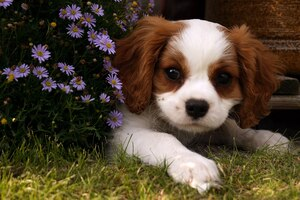

In [ ]:
# Image is Cute_dog.jpg from Wikimedia
fn = Path('samples/puppy.jpg')
display.Image(filename=fn, width=200)

In [ ]:
img = fn.read_bytes()

Mistral AI expects an image message to have the following structure

```js
{
  "type": "image_url",
  "image_url": {
    "url": f"data:{MEDIA_TYPE};base64,{IMG}"
  }
}
```
`msglm` automatically detects if a message is an image, encodes it, and generates the data structure above.
All we need to do is a create a list containing our image and a query and then pass it to `mk_msg`.

Let's try it out...

In [ ]:
q = "In brief, what color flowers are in this image?"
msg = [mk_msg(img), mk_msg(q)]

In [ ]:
vision_models

['pixtral-large-2411', 'mistral-small-2503', 'mistral-ocr-2503']

In [ ]:
c = Chat(vision_models[0])
c([img, q])

The flowers in the image are purple with yellow centers.

<details>

- id: 7419ce04d287433991f72ed2b079b1bc
- object: chat.completion
- model: pixtral-large-2411
- usage: prompt_tokens=274 completion_tokens=11 total_tokens=285
- created: 1743582905
- choices: [ChatCompletionChoice(index=0, message=AssistantMessage(content='The flowers in the image are purple with yellow centers.', tool_calls=None, prefix=False, role='assistant'), finish_reason='stop')]

</details>